In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pickle

In [3]:
# Load the dataset
df = pd.read_excel("SignedPlayersDatasetVALORANT.xlsx")

In [5]:
# Fix name errors
df = df.replace('\n','', regex=True)
df = df.replace(' ','', regex=True)

In [7]:
# Assuming 'Date' is in datetime format, if not, convert it using:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df

,date,player,rounds,rating,average_combat_score,kills_deaths,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage,total_kills,total_deaths,total_assists,total_first_kills,total_first_deaths
0,2022-10-07,Cryocells,119,1.22,249.6,1.39,158.8,0.89,0.11,0.15,0.06,0.24,0.06,106,76,13,18,7
1,2022-08-31,Cryocells,285,1.15,232.2,1.27,143.4,0.85,0.13,0.18,0.13,0.24,0.19,242,191,36,50,36
2,2023-02-13,Cryocells,175,1.00,219.3,1.01,137.5,0.75,0.25,0.13,0.18,0.18,0.00,131,130,54,23,32
3,2022-08-31,bang,157,1.04,192.0,1.08,129.1,0.71,0.36,0.07,0.09,0.40,0.29,112,104,56,11,14
4,2023-02-13,bang,175,0.99,200.1,0.98,134.5,0.74,0.34,0.13,0.12,0.39,0.05,129,131,59,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2022-08-31,yay,492,1.26,254.6,1.50,159.8,0.93,0.09,0.20,0.08,0.26,0.15,460,306,42,96,40
414,2023-02-13,yay,89,1.11,201.6,1.24,127.4,0.75,0.15,0.15,0.12,0.29,0.08,67,54,13,13,11
415,2022-10-04,hoody,128,1.11,242.8,1.08,155.6,0.82,0.30,0.12,0.08,0.30,0.18,105,97,38,15,10
416,2023-02-13,hoody,97,0.96,189.0,0.94,135.4,0.63,0.16,0.06,0.08,0.23,0.20,61,65,16,6,8


In [8]:
# Extract relevant features and target variable
features = ['rounds', 'kills_deaths', 'average_damage_per_round', 'kills_per_round',
            'assists_per_round', 'first_kills_per_round', 'first_deaths_per_round',
            'headshot_percentage', 'clutch_success_percentage', 'total_kills',
            'total_deaths', 'total_assists', 'total_first_kills', 'total_first_deaths']

target = 'average_combat_score'

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [10]:
# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [31]:
# Save Model
filename = "model.sav"
pickle.dump(model, open("model.sav", 'wb'))

NameError: name 'pickle' is not defined

In [ ]:
# Load Model
model = pickle.load(open("model.sav", 'rb'))

In [11]:
# Make predictions on the test set
predictions = model.predict(X_test)

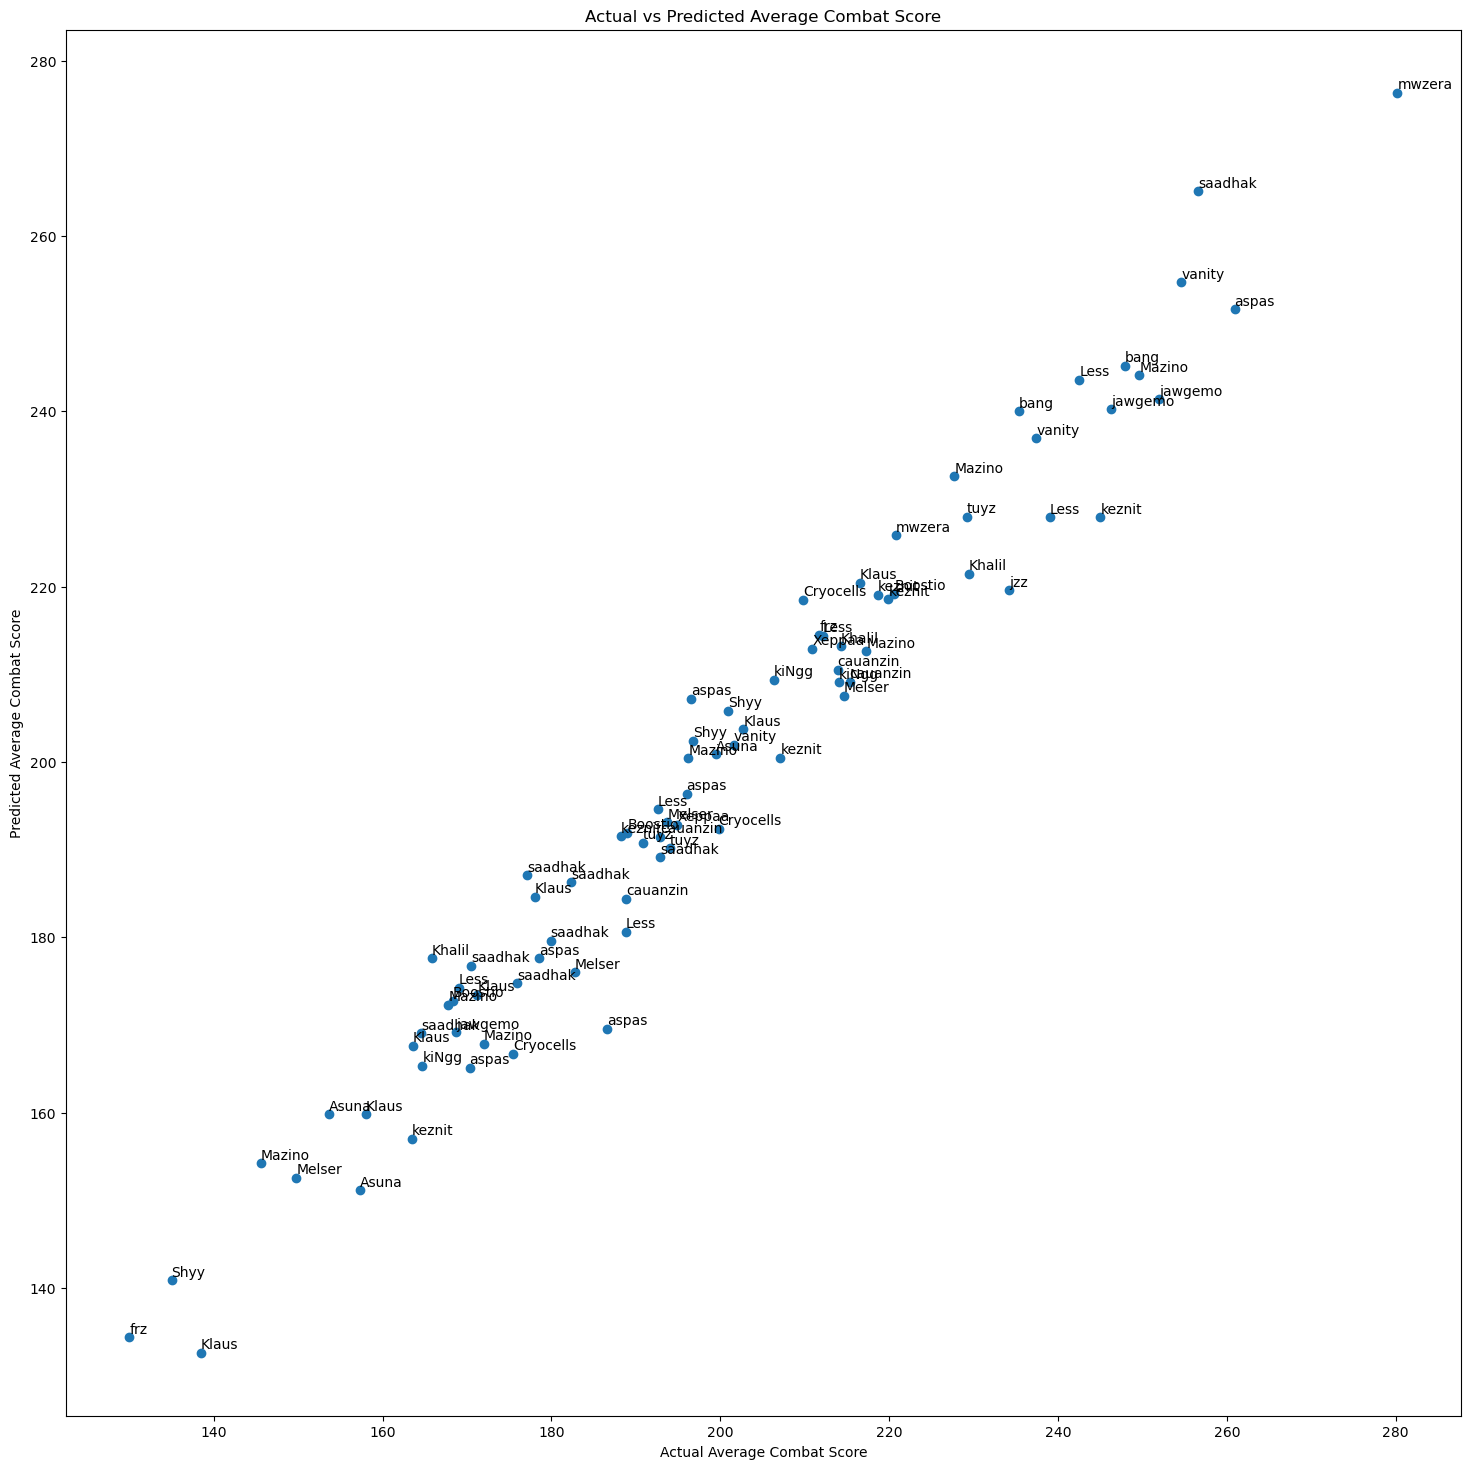

In [12]:
# Create a larger figure
plt.figure(figsize=(18, 18))

# Plot actual vs predicted values with player names
plt.scatter(y_test, predictions)
plt.xlabel("Actual Average Combat Score")
plt.ylabel("Predicted Average Combat Score")
plt.title("Actual vs Predicted Average Combat Score")

# Display player names with a larger offset
for i, player_name in enumerate(df['player']):
    try:
        # Add a larger offset to player names
        offset = 3  # Adjust this value based on your preference
        plt.annotate(player_name, (y_test.iloc[i], predictions[i]), textcoords="offset points", xytext=(0, offset))
    except IndexError:
        # Handle the case where the indices go out of bounds
        pass

# Show the larger plot
plt.show()

In [20]:
# Find Mean Squared Error
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 36.04869754422289


In [21]:
# Future dates for prediction
future_dates = ['2024-03-01', '2024-03-15', '2024-04-01']

In [22]:
# Convert future dates to datetime format
future_dates = pd.to_datetime(future_dates)

In [23]:
# Create a dataframe for predictions with future dates
future_df = pd.DataFrame({'Date': future_dates})
future_df[features] = df[features].mean()  # Use mean values for missing features

In [24]:
# Make predictions for future dates
future_predictions = model.predict(future_df[features])

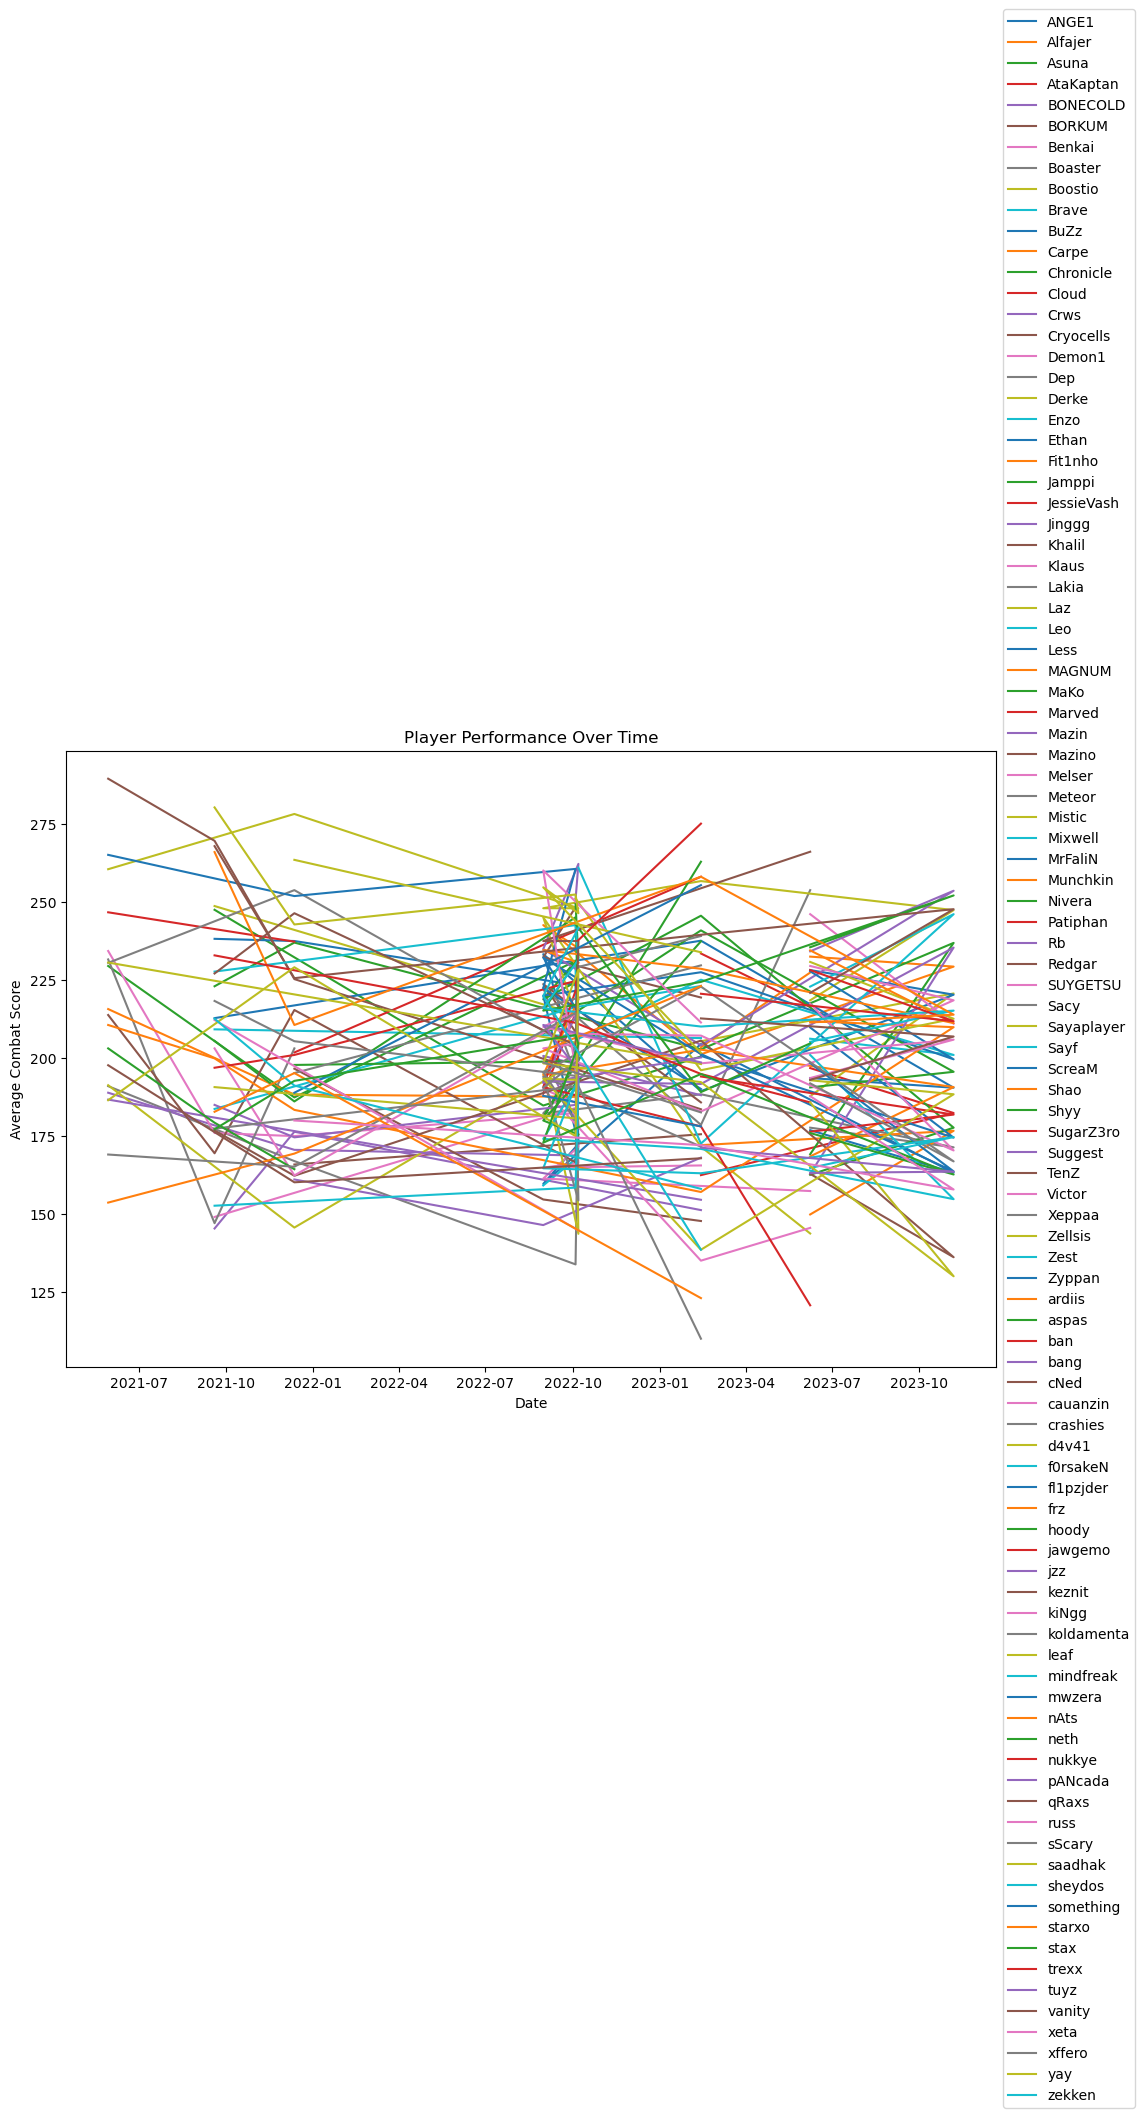

In [25]:
import matplotlib.pyplot as plt

# Create a larger figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the performance of players from every tournament
for player_name, player_data in df.groupby('player'):
    ax.plot(player_data['date'], player_data['average_combat_score'], label=player_name)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Average Combat Score')
ax.set_title('Player Performance Over Time')

# Move the legend outside the plot box
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

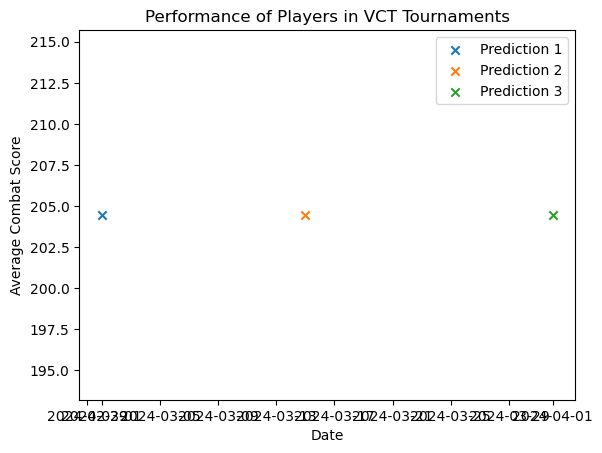

In [26]:
# Plot future predictions
for i, future_date in enumerate(future_dates):
    plt.scatter(future_date, future_predictions[i], marker='x', label=f'Prediction {i+1}')

    
plt.xlabel("Date")
plt.ylabel("Average Combat Score")
plt.title("Performance of Players in VCT Tournaments")
plt.legend()
plt.show()

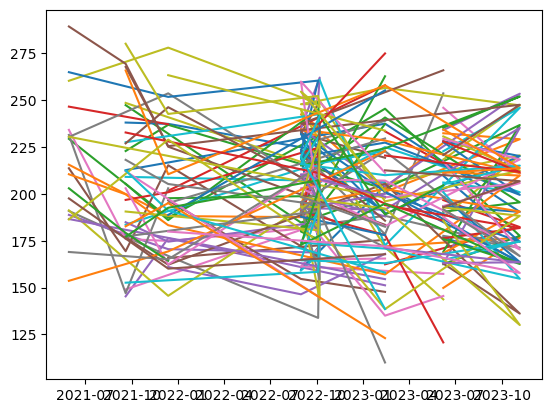

In [27]:
# Plotting the performance of players from every tournament
for player_name, player_data in df.groupby('player'):
    plt.plot(player_data['date'], player_data['average_combat_score'], label=player_name)

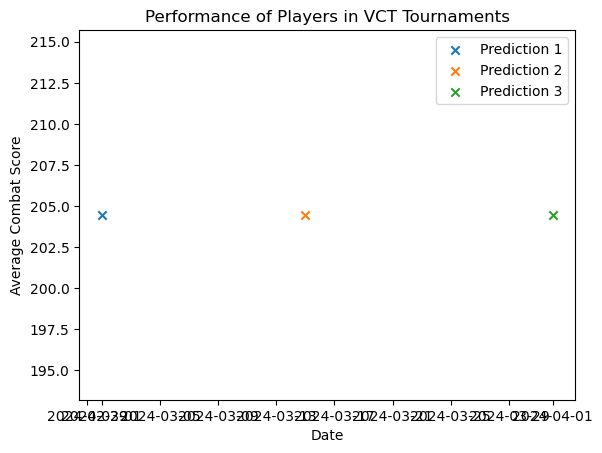

In [28]:
# Plot future predictions
for i, future_date in enumerate(future_dates):
    plt.scatter(future_date, future_predictions[i], marker='x', label=f'Prediction {i+1}')

plt.xlabel("Date")
plt.ylabel("Average Combat Score")
plt.title("Performance of Players in VCT Tournaments")
plt.legend()
plt.show()

In [29]:
# Find and display the top 10 players with the best predicted average_combat_score
top_players_indices = df['average_combat_score'].argsort()[-10:][::-1]
top_players = df.iloc[top_players_indices][['player', 'average_combat_score']]

print(top_players)

     player  average_combat_score
118    TenZ                 289.4
409     yay                 280.2
152   Derke                 278.1
207   trexx                 275.0
119    TenZ                 269.5
176    cNed                 267.8
40   keznit                 266.0
252    nAts                 265.9
198  ScreaM                 265.0
134    leaf                 263.4
